In [42]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
import matplotlib.animation as animation
import os
from IPython.display import HTML
import PyQt5


colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

In [43]:
def read_txt(filepath):
    file = open(filepath)
    csvreader = csv.reader(file)
    rows = []
    for row in csvreader:
        rows.append(row)
    file.close()
    return rows

def read_output(filepath):
    txt_rows = read_txt(filepath)
    df = pd.DataFrame(txt_rows[0:], columns=['time', 'generation'])
    df = df.astype({'time': float, 'generation': int})
    return df

In [44]:
folder = "3d_new"

In [45]:
rows = read_txt(f'{folder}/GenStats.txt')
df = pd.DataFrame(rows[0:], columns=['time', 'generation'])
df = df.astype({'time': float, 'generation': int})
df.head()

,time,generation
0,0.00,1
1,5.02,1
2,5.02,1
3,5.02,1
4,5.02,1


In [46]:
df = df.groupby(['time', 'generation']).size().reset_index(name='count')
df

,time,generation,count
0,0.00,1,1
1,5.02,1,6
2,10.04,1,6
3,11.06,1,6
4,12.08,1,6
...,...,...,...
45768,3485.90,6,5
45769,3485.90,7,1
45770,3485.90,8,3
45771,3485.90,9,2


In [47]:
df_stack = pd.DataFrame()
df_stack['time'] = df['time'].unique()
for i in range(1, df["generation"].max()+1):
    df_temp = df[df['generation'] == i][['time', 'count']]
    df_temp = df_temp.rename(columns={'count': 'generation ' + str(i)})
    df_stack = pd.merge(df_stack, df_temp, on='time', how='left')
df_stack = df_stack.fillna(0)
df_stack

,time,generation 1,generation 2,generation 3,generation 4,generation 5,generation 6,generation 7,generation 8,generation 9,generation 10,generation 11
0,0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.02,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.04,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.06,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.08,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6906,3483.90,5,5.0,12.0,8.0,7.0,5.0,1.0,3.0,2.0,1.0,0.0
6907,3484.40,5,5.0,12.0,8.0,7.0,5.0,1.0,3.0,2.0,1.0,0.0
6908,3484.90,5,5.0,12.0,8.0,7.0,5.0,1.0,3.0,2.0,1.0,0.0
6909,3485.40,5,5.0,12.0,8.0,7.0,5.0,1.0,3.0,2.0,1.0,0.0


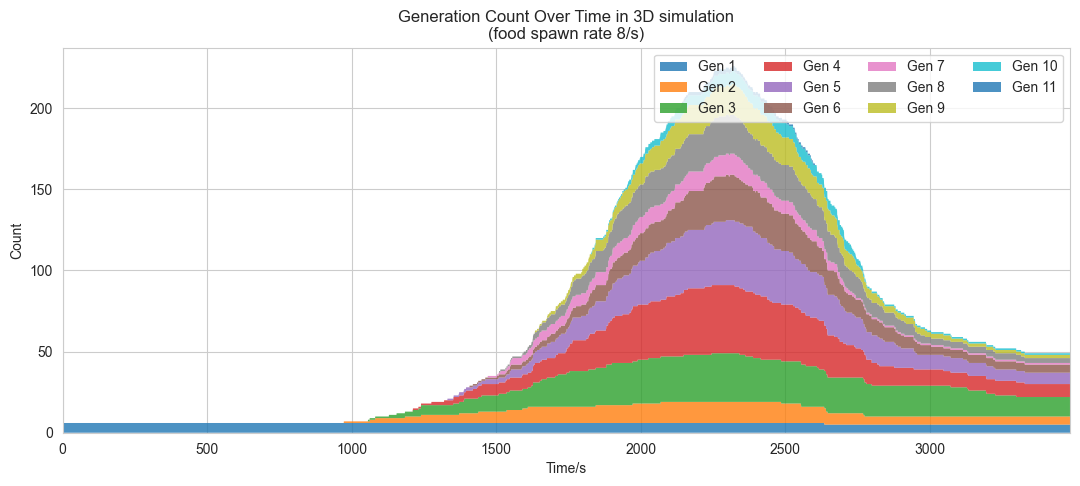

In [48]:
plt.figure(figsize=(13, 5))
plt.stackplot(df_stack['time'], df_stack.iloc[:, 1:].T, labels=['Gen ' + str(i) for i in range(1, df["generation"].max()+1)], alpha=0.8, colors=colors, edgecolor='none')
plt.xlim(0, df_stack['time'].max())
plt.xlabel('Time/s')
plt.ylabel('Count')
plt.title('Generation Count Over Time in 3D simulation\n(food spawn rate 8/s)')
plt.legend(ncol=4)

In [49]:
rows = read_txt(f'{folder}/LifeStats.txt')
df2 = pd.DataFrame(rows[0:], columns=['generation', 'alive time'])
df2 = df2.astype({'generation': int, 'alive time': float})
df2.head()

,generation,alive time
0,1,102.4531
1,1,102.4131
2,1,112.8977
3,1,123.1003
4,1,154.3142


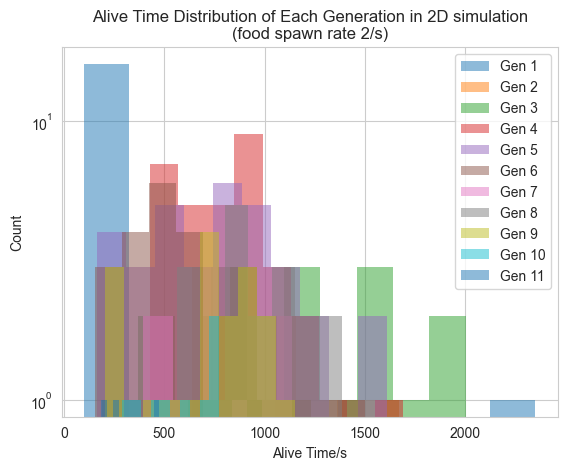

In [50]:
for i in range(1, df2['generation'].max()+1):
    plt.hist(df2[df2['generation'] == i]['alive time'], bins=10, alpha=0.5, label='Gen ' + str(i), log=True, edgecolor='none')
    
plt.xlabel('Alive Time/s')
plt.ylabel('Count')
plt.title('Alive Time Distribution of Each Generation in 2D simulation\n(food spawn rate 2/s)')
plt.legend()

In [51]:
# group by generation and calculate the average alive time and error, and median alive time
df2_alive_time = df2.groupby('generation').agg({'alive time': ['mean', 'std', 'median']}).reset_index()
df2_alive_time.columns = ['generation', 'mean', 'error', 'median']
df2_alive_time

,generation,mean,error,median
0,1,298.876418,530.871787,164.87720
1,2,1096.864875,401.827575,1107.95300
2,3,1113.396850,519.288117,1141.62250
3,4,808.875956,290.798339,799.29680
4,5,773.996639,361.883107,773.95250
5,6,607.815968,319.729882,558.50490
6,7,736.368558,259.278732,710.56650
7,8,878.671600,308.992950,909.86450
8,9,703.920144,269.001854,724.42360
9,10,554.840825,183.178149,553.84445


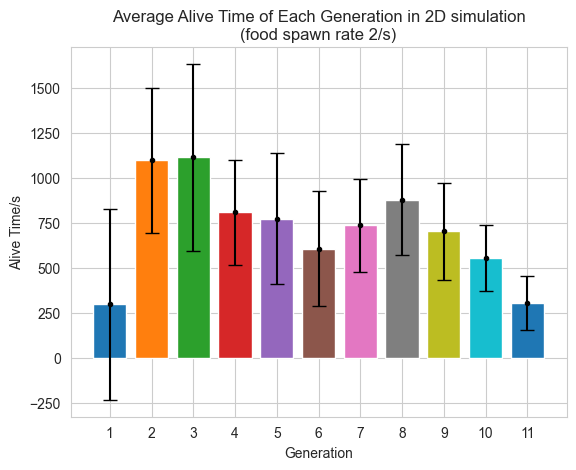

In [52]:
plt.bar(df2_alive_time['generation'], df2_alive_time['mean'], color=colors)
plt.errorbar(df2_alive_time['generation'], df2_alive_time['mean'], yerr=df2_alive_time['error'], fmt='.', color='black', capsize=5)
plt.xlabel('Generation')
plt.xticks(range(1, df2['generation'].max()+1))
plt.ylabel('Alive Time/s')
plt.title('Average Alive Time of Each Generation in 2D simulation\n(food spawn rate 2/s)')
plt.show()

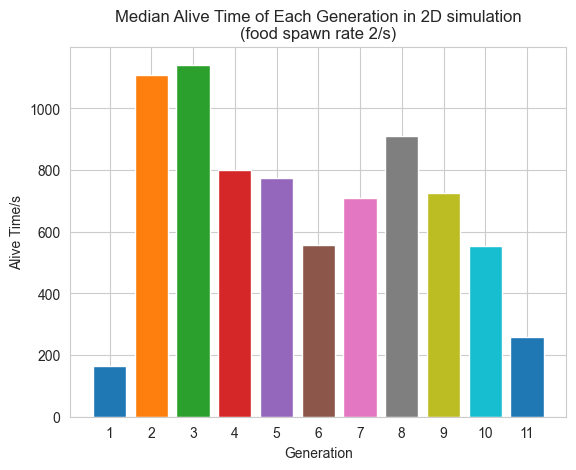

In [53]:
plt.bar(df2_alive_time['generation'], df2_alive_time['median'], color=colors)
plt.xlabel('Generation')
plt.xticks(range(1, df2['generation'].max()+1))
plt.ylabel('Alive Time/s')
plt.title('Median Alive Time of Each Generation in 2D simulation\n(food spawn rate 2/s)')
plt.show()

In [54]:
df2_alive_time

,generation,mean,error,median
0,1,298.876418,530.871787,164.87720
1,2,1096.864875,401.827575,1107.95300
2,3,1113.396850,519.288117,1141.62250
3,4,808.875956,290.798339,799.29680
4,5,773.996639,361.883107,773.95250
5,6,607.815968,319.729882,558.50490
6,7,736.368558,259.278732,710.56650
7,8,878.671600,308.992950,909.86450
8,9,703.920144,269.001854,724.42360
9,10,554.840825,183.178149,553.84445


In [55]:
rows = read_txt(f'{folder}/FoodPopulationStats.txt')
df3 = pd.DataFrame(rows[0:], columns=['time', 'population', 'food'])
df3 = df3.astype({'time': float, 'population': int, 'food': int})
df3.head()

,time,population,food
0,0.00,1,1300
1,5.02,6,1336
2,10.04,6,1372
3,11.06,6,1379
4,12.08,6,1387


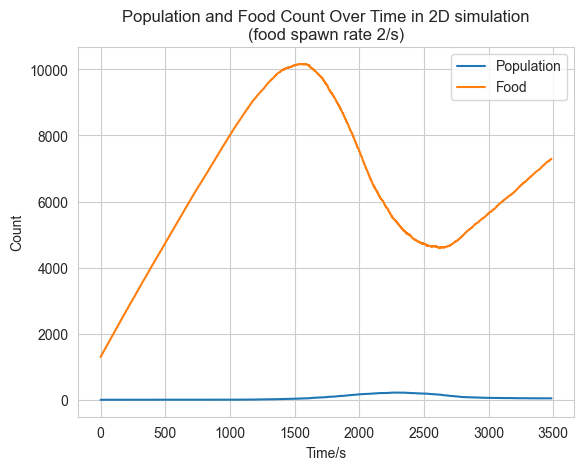

In [56]:
plt.plot(df3['time'], df3['population'], label='Population', color=colors[0])
plt.plot(df3['time'], df3['food'], label='Food', color=colors[1])
plt.xlabel('Time/s')
plt.ylabel('Count')
plt.title('Population and Food Count Over Time in 2D simulation\n(food spawn rate 2/s)')
plt.legend()
plt.show()

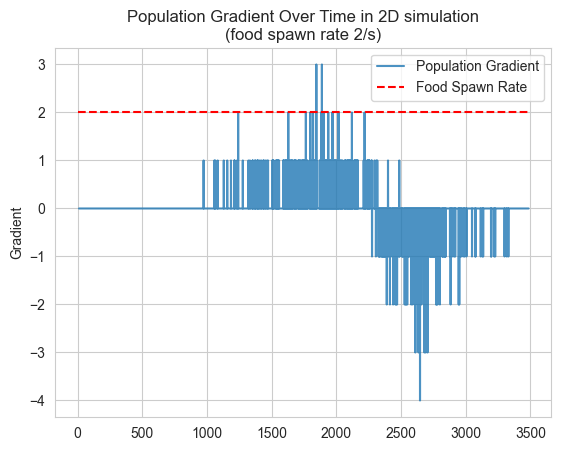

In [57]:
# plot gradient of population and food
df3['population_gradient'] = df3['population'].diff()
df3['food_gradient'] = df3['food'].diff()
plt.plot(df3['time'][2:], df3['population_gradient'][2:], label='Population Gradient', color=colors[0], alpha=0.8)
plt.hlines(2, 0, df3['time'].max(), color='red', linestyles='dashed', alpha=1, label='Food Spawn Rate')
plt.ylabel('Gradient')
plt.title('Population Gradient Over Time in 2D simulation\n(food spawn rate 2/s)')
plt.legend()
plt.show()